## Random Forest

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
# HRA 데이터셋을 가져오는 function 생성
def get_human_dataset():
    # feature 이름 가져오기
    feature_name_df = pd.read_csv('./data/HAR/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
    feature_name=feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 데이터 세트 DF 로 로딩
    X_train=pd.read_csv(
        './data/HAR/train/X_train.txt'
        ,sep='\s+'
        #,names = feature_name  # 컬럼명 지정
        ,header=None
    )
    X_test=pd.read_csv('./data/HAR/test/X_test.txt', sep='\s+', header=None
                      # ,names=fn
                      )
    
    
    # 레이블 데이터를 DF로 로딩
    y_train=pd.read_csv(
        './data/HAR/train/y_train.txt'
        ,sep='\s+'
        ,names=['action']  # 컬럼명 지정
    )
    y_test=pd.read_csv('./data/HAR/test/y_test.txt', sep='\s+', names=['action'])
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [14]:
feature_name_df = pd.read_csv('./data/HAR/features.txt', sep='\s+', header=None, names=['column_index','column_name'])
feature_name=feature_name_df.iloc[:,1].values.tolist()
X_train.columns=feature_name
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [15]:
X_test.columns=feature_name
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [19]:
# 모델 객체 생성
rf_clf=RandomForestClassifier(random_state=0)
# 학습
rf_clf.fit(X_train, y_train)
# 테스트 데이터의 예측값 추출
pred= rf_clf.predict(X_test)
# 정확도 평가
accu = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accu))

랜덤 포레스트 정확도: 0.9253


In [20]:
# GridSearchCV : 교차검증을 통해 베스트 하이퍼 파라미터 추출
from sklearn.model_selection import GridSearchCV

param ={
      'n_estimators':[100]  # 한 조건당 만드는 모델수 : default :10 
    , 'max_depth':[6,8,10,12]
    , 'min_samples_leaf':[8,12,18]
    , 'min_samples_split' : [8,16,20]
}
# 각 조건당 100개의 모델을 만드므로, 총 36*100 =3600번을 돌리게됨.

# 랜덤 포레스트 객체 생성
rf_clf=RandomForestClassifier(
      random_state=0
    , n_jobs=-1   # 가능한 전체 코어를 다 쓰려면 -1 주기
)

# GridSearchCV 객체 생성
grid_cv=GridSearchCV(
      rf_clf       #적용할 알고리즘 객체
    , param_grid=param   # 적용할 하이퍼 파라미터
    , cv=2       # 교차 검증할 데이터 셋
    , n_jobs=-1    # 전체 코어 다쓰도록 지정
)
# cv 2개 주므로 7200번 돌리게됨.

In [21]:
# 학습 시작
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [22]:
# Best parameter
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [23]:
grid_cv.best_score_
# 수치는 랜덤포레스트 단독보다 약간 떨어졌으나, 일반화 성능은 올라갔을 것으로 추측됨.

0.9179815016322089

In [24]:
# 다른 조건 베스트파라미터로 그대로 ref 로 두고, 예측기 수만 늘려서 확인
rf_clf1 = RandomForestClassifier(
      n_estimators=300        # 300개로 예측기 늘렸을 때 결과 확인하기
    , max_depth=10
    , min_samples_leaf=8
    , min_samples_split=8
    , random_state=0
)

rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
accu = accuracy_score(y_test, pred)
accu

0.9165252799457075

결정트리 개수 늘려도 큰 차이 없음, 100개로 유지

In [25]:
# 피처 중요도 출력 : 561 개 피처 => 20 개 추출
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# 피처 중요도 추출 : 학습한 객체에 들어있음.
type(rf_clf1.feature_importances_)

numpy.ndarray

In [27]:
# 피처 중요도 값 추출
ftr_imp = rf_clf1.feature_importances_
# 시리즈 변환
ftr_imp_sr = pd.Series(ftr_imp, index=X_train.columns)
# 정렬후 상위 20개 추출
ftr_top20 = ftr_imp_sr.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-min()-X                0.032487
tGravityAcc-mean()-Y               0.030986
tGravityAcc-min()-Y                0.029188
angle(X,gravityMean)               0.029071
angle(Y,gravityMean)               0.029033
tGravityAcc-energy()-X             0.028219
tGravityAcc-max()-X                0.027648
tGravityAcc-mean()-X               0.027126
tGravityAcc-max()-Y                0.024552
tGravityAcc-energy()-Y             0.015663
fBodyAccJerk-bandsEnergy()-1,8     0.014605
tGravityAcc-max()-Z                0.012352
tGravityAcc-arCoeff()-Z,2          0.011623
fBodyAccMag-mad()                  0.010764
angle(Z,gravityMean)               0.010431
tGravityAcc-arCoeff()-Y,1          0.010140
fBodyAccJerk-bandsEnergy()-1,16    0.010058
fBodyAccMag-energy()               0.009471
tGravityAcc-mean()-Z               0.009270
tGravityAcc-arCoeff()-Z,1          0.009110
dtype: float64

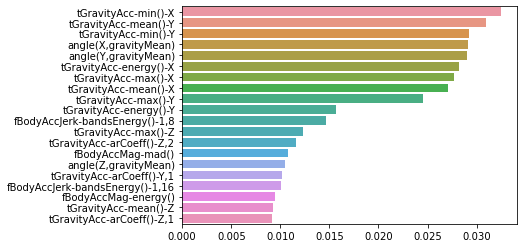

In [29]:
# 시각화
sns.barplot(
    x=ftr_top20
    , y=ftr_top20.index
)
plt.show()

## GBM(Gradient Boostinig Machine)

경사 하강법 설명 : https://bioinformaticsandme.tistory.com/125

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [31]:
# 시작 시간
start_time = time.time()

# 모델 객체 생성
gb_clf = GradientBoostingClassifier(random_state=0)
# 학습
gb_clf.fit(X_train, y_train)
# 예측
gb_pred = gb_clf.predict(X_test)
# 평가
gb_accu = accuracy_score(y_test, gb_pred)

# 걸린 시간
end_time = time.time() - start_time

# 결가 출력
print('GBM의 정확도 : {0:.4f}'.format(gb_accu))
print('GBM 수행시간:{0:.1f}'.format(end_time))

GBM의 정확도 : 0.9389
GBM 수행시간:622.6


수행시간이 10분 걸렸다. GBM 의 단점 : 속도

### XGBoost
- c/c++ 로 작성되었고, 래퍼클래스를 통해 파이썬에서 사용 가능
- conda install -c anaconda py-xgboost 로 아나콘다 프롬프트에서 설치 필요

In [35]:
import xgboost as xgb

In [36]:
from xgboost import XGBClassifier

In [39]:
xgb.__version__

'0.90'

### Native XGBoost 적용
- 사이킷런과는 다른 별개의 모듈
- 데이터셋 : 유방암 데이터셋

In [40]:
# 자체 시각화 기능있음
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [41]:
# 데이터 로딩
dataset= load_breast_cancer()
X_features = dataset.data    # 데이터
y_labels = dataset.target   # 답

In [43]:
# 데이터프레임 생성
cancer_df = pd.DataFrame(
      data=X_features   # 데이터
    , columns=dataset.feature_names   # 컬럼명
)

In [44]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [45]:
# 기존 데이터프레임에, 답 추가
cancer_df['target']=y_labels
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [48]:
# 악성, 양성 : 이진분류
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [55]:
list(zip(dataset.target_names, cancer_df['target'].value_counts()))

[('malignant', 357), ('benign', 212)]

In [56]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_features
    , y_labels
    , test_size=0.2
    , random_state = 156
)

In [58]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [59]:
# DMatrix : 데이터 변환
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [62]:
# 기본 세팅
param = {
      'max_depth':3
    , 'eta' : 0.1  # 학습률
    , 'objective' : 'binary:logistic'
    , 'eval_metric':'logloss'
    , 'early_stoppings':100
}
num_rounds=400

In [63]:
# 'train' 으로 명기된 train 데이터 세트, test data는 'eval'로 명기
wlist=[(dtrain,'train'),(dtest,'eval')]

# 학습 진행
xgb_model = xgb.train(
      params=param   # 파라미터
    , dtrain=dtrain  # 학습할 데이터
    , num_boost_round=num_rounds  # 모델 객체의 개수 400개
    , evals=wlist  # 평가
)

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-logloss:0.087038
[181]	train-logloss:0.006884	eval-logloss:0.086799
[182]	train-logloss:0.006866	eval-logloss:0.086826
[183]	train-logloss:0.006849	eval-log

[326]	train-logloss:0.005354	eval-logloss:0.08578
[327]	train-logloss:0.005348	eval-logloss:0.085857
[328]	train-logloss:0.005342	eval-logloss:0.085939
[329]	train-logloss:0.005336	eval-logloss:0.085825
[330]	train-logloss:0.00533	eval-logloss:0.085869
[331]	train-logloss:0.005324	eval-logloss:0.085893
[332]	train-logloss:0.005318	eval-logloss:0.085922
[333]	train-logloss:0.005312	eval-logloss:0.085842
[334]	train-logloss:0.005306	eval-logloss:0.085735
[335]	train-logloss:0.0053	eval-logloss:0.085816
[336]	train-logloss:0.005294	eval-logloss:0.085892
[337]	train-logloss:0.005288	eval-logloss:0.085936
[338]	train-logloss:0.005283	eval-logloss:0.08583
[339]	train-logloss:0.005277	eval-logloss:0.085909
[340]	train-logloss:0.005271	eval-logloss:0.085831
[341]	train-logloss:0.005265	eval-logloss:0.085727
[342]	train-logloss:0.00526	eval-logloss:0.085678
[343]	train-logloss:0.005254	eval-logloss:0.085721
[344]	train-logloss:0.005249	eval-logloss:0.085796
[345]	train-logloss:0.005243	eval-log

In [64]:
pred_probs = xgb_model.predict(dtest)

In [67]:
# 예측 확률값 추출(10개만)
np.round(pred_probs[:10],2)

array([0.95, 0.  , 0.9 , 0.09, 0.99, 1.  , 1.  , 1.  , 1.  , 0.  ],
      dtype=float32)

In [69]:
preds=[1 if x > 0.5  else 0 for x in pred_probs]  # 이진분류시 signoid function에 근거한 코드 (0.5이상이면 1, 아니면 0으로 판정)
preds[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [71]:
def get_clf_eval(y_test,pred):
    conf= confusion_matrix(y_test, pred)   #오차행렬
    accu = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall_ = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차행렬')
    print(conf)
    
    out_str= '정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'
    print(out_str.format(accu, prec, recall_, f1, roc_auc))

In [72]:
get_clf_eval(y_test, preds)

오차행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도:0.9744, 재현율:0.9870, F1:0.9806, AUC:0.9665


XGBoost 를 사용한 모델 성능이 뛰어나다.

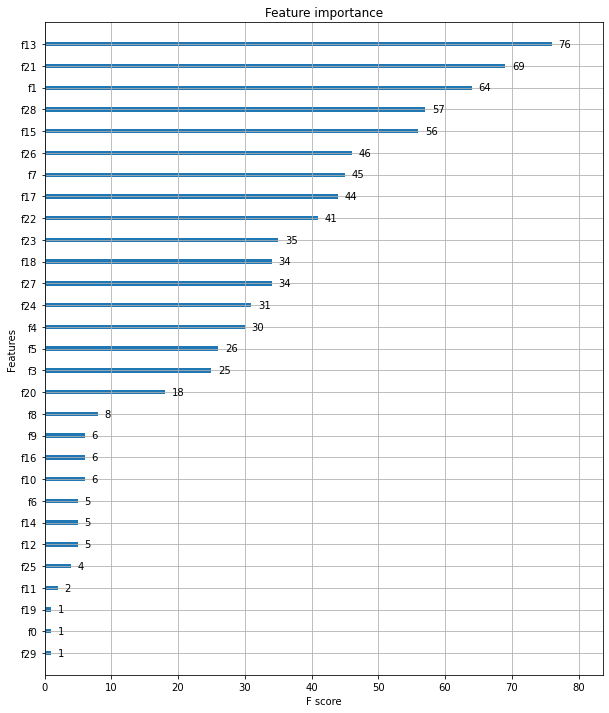

In [73]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)  #ax: 표시할 축

### Wrapper XGBoost
- 사이킷런 래퍼 클래스 사용 XGBClassifier => 사이킷런 메소드 적용가능
- GridSearchCV 등 다른 사이킷런  유틸리티 그대로 사용 가능

In [74]:
# 사이킷 런 래퍼클래스 : XGBClassifier
from xgboost import XGBClassifier

# 검증에 사용할 데이터/답 지정
evals=[(X_test,y_test)]

# 모델 객체 생성
xgb_wrap = XGBClassifier(
    n_estimators=400
    , learning_rate=0.1  # xgb native의 eta와 동일
    , max_depth=3
)

In [78]:
# 학습
xgb_wrap.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True, early_stopping_rounds=100)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

XGBClassifier(n_estimators=400)

In [79]:
w_preds=xgb_wrap.predict(X_test)

In [80]:
get_clf_eval(y_test, w_preds)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9530


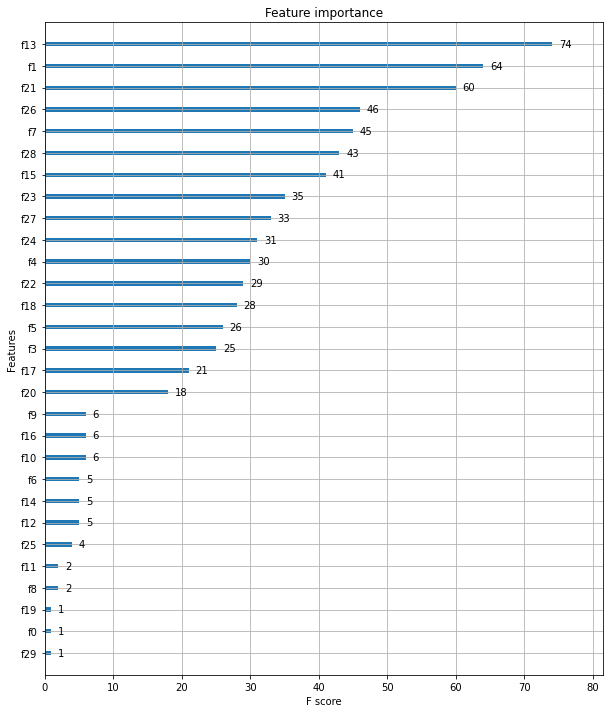

In [81]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrap, ax=ax)
plt.show()